<a href="https://colab.research.google.com/github/Mohan259/TF_Practice/blob/main/CIFAR10_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import models, datasets, layers

In [ ]:
(x_train,y_train),(x_test,y_test)     =  datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
flat=y_train.flatten()
flat

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
flat.shape

(50000,)

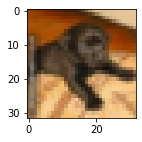

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[56])

In [ ]:
y_train[56]

array([5], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[56][0]]

'dog'

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [ ]:
y_train=y_train.flatten()
y_test=y_test.flatten()
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
# Normalizing the image values
x_train=x_train/255
x_test=x_test/255

In [ ]:
#x_train
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [ ]:
cif10=models.Sequential([
          # 1st Conv+Relu,Maxpool Layers
          layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
          layers.MaxPool2D(pool_size=(2,2)),
          # 2nd Conv+Relu,Maxpool Layers
          layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
          layers.MaxPool2D(pool_size=(2,2)),

          # FC(Fully Connected ) Layer
          layers.Flatten(),
          layers.Dense(64,activation='relu'),
          layers.Dense(10,activation='softmax')

         ])

In [ ]:
cif10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
cif10.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 73s 46ms/step - loss: 1.0993 - accuracy: 0.6172
Epoch 2/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9640 - accuracy: 0.6645
Epoch 3/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8803 - accuracy: 0.6952
Epoch 4/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8153 - accuracy: 0.7183
Epoch 5/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7599 - accuracy: 0.7374
Epoch 6/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7161 - accuracy: 0.7523
Epoch 7/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6734 - accuracy: 0.7637
Epoch 8/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6323 - accuracy: 0.7793
Epoch 9/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5958 - accuracy: 0.7922
Epoch 10/20
1563/1563 [==============================] - 69s 44m

In [ ]:
cif10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
cif10.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.2816 - accuracy: 0.6907


[1.2816375494003296, 0.6906999945640564]

In [ ]:
predicted=cif10.predict(x_test)

In [ ]:
predicted_class=np.array([np.argmax(e) for e in predicted])
predicted_class

array([3, 8, 0, ..., 5, 4, 7])

In [ ]:
predicted_class.shape

(10000,)

In [ ]:
print(tf.version.VERSION)

2.8.0


In [ ]:
cif10.save('mk_cifar10.h5')

In [ ]:
new_model=models.load_model('mk_cifar10.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1